<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Ad_Ease_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Data

In [ ]:
!pip install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
!gdown 1qQkymAitU6l2pSe702rDUhQpoP8MUZXl

Downloading...
From (original): https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl
From (redirected): https://drive.usercontent.google.com/download?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl&confirm=t&uuid=1cef2b8f-77ce-4ee3-9eb0-3386737e0703
To: /content/train_1.csv
100% 278M/278M [00:05<00:00, 53.3MB/s]


In [ ]:
!gdown 19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE

Downloading...
From: https://drive.google.com/uc?id=19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE
To: /content/Exog_Campaign_eng
100% 1.10k/1.10k [00:00<00:00, 3.08MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20, 6)

## Main Dataset Load

In [ ]:
data = pd.read_csv("train_1.csv")

In [ ]:
data.shape

(145063, 551)

In [ ]:
data.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [ ]:
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
data.Page.nunique()

145063

In [ ]:
data.Page

0                   2NE1_zh.wikipedia.org_all-access_spider
1                    2PM_zh.wikipedia.org_all-access_spider
2                     3C_zh.wikipedia.org_all-access_spider
3                4minute_zh.wikipedia.org_all-access_spider
4         52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
                                ...                        
145058    Underworld_(serie_de_películas)_es.wikipedia.o...
145059    Resident_Evil:_Capítulo_Final_es.wikipedia.org...
145060    Enamorándome_de_Ramón_es.wikipedia.org_all-acc...
145061    Hasta_el_último_hombre_es.wikipedia.org_all-ac...
145062    Francisco_el_matemático_(serie_de_televisión_d...
Name: Page, Length: 145063, dtype: object

## lets separate Language, Domain,Access and Origin

In [ ]:
data["Page1"] = data.Page.str.split("_").apply(lambda x : x[-3:])

In [ ]:
data.Page1

0         [zh.wikipedia.org, all-access, spider]
1         [zh.wikipedia.org, all-access, spider]
2         [zh.wikipedia.org, all-access, spider]
3         [zh.wikipedia.org, all-access, spider]
4         [zh.wikipedia.org, all-access, spider]
                           ...                  
145058    [es.wikipedia.org, all-access, spider]
145059    [es.wikipedia.org, all-access, spider]
145060    [es.wikipedia.org, all-access, spider]
145061    [es.wikipedia.org, all-access, spider]
145062    [es.wikipedia.org, all-access, spider]
Name: Page1, Length: 145063, dtype: object

In [ ]:
data["Domain1"] = data.Page1.apply(lambda x : x[0])
data["Access"] = data.Page1.apply(lambda x : x[1])
data["Origin"] = data.Page1.apply(lambda x : x[2])

In [ ]:
data.Domain1= data.Domain1.str.split(".")

In [ ]:
data.Domain1.tail(5)

145058    [es, wikipedia, org]
145059    [es, wikipedia, org]
145060    [es, wikipedia, org]
145061    [es, wikipedia, org]
145062    [es, wikipedia, org]
Name: Domain1, dtype: object

In [ ]:
data["Domain"] = data.Domain1.apply(lambda x : x[1])
data["Language"] = data.Domain1.apply(lambda x : x[0])

In [ ]:
data.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31', 'Page1',
       'Domain1', 'Access', 'Origin', 'Domain', 'Language'],
      dtype='object', length=557)

In [ ]:
data[data.columns[-4:]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Access    145063 non-null  object
 1   Origin    145063 non-null  object
 2   Domain    145063 non-null  object
 3   Language  145063 non-null  object
dtypes: object(4)
memory usage: 4.4+ MB


In [ ]:
for i in data.columns[-4:]:
  print("unique Values of",i, "are",data[i].nunique())
  print(data[i].value_counts())
  print("******************************************************************")

unique Values of Access are 3
all-access    74315
mobile-web    35939
desktop       34809
Name: Access, dtype: int64
******************************************************************
unique Values of Origin are 2
all-agents    110150
spider         34913
Name: Origin, dtype: int64
******************************************************************
unique Values of Domain are 3
wikipedia    127208
wikimedia     10555
mediawiki      7300
Name: Domain, dtype: int64
******************************************************************
unique Values of Language are 9
en         24108
ja         20431
de         18547
fr         17802
zh         17229
ru         15022
es         14069
commons    10555
www         7300
Name: Language, dtype: int64
******************************************************************


In [ ]:
data[data.Language == "www"].head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Page1,Domain1,Access,Origin,Domain,Language
19611,"""Keep_me_logged_in""_extended_to_one_year_www.m...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,14.0,7.0,12.0,"[www.mediawiki.org, all-access, all-agents]","[www, mediawiki, org]",all-access,all-agents,mediawiki,www
19612,2017_wikitext_editor_www.mediawiki.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.0,43.0,100.0,73.0,"[www.mediawiki.org, all-access, all-agents]","[www, mediawiki, org]",all-access,all-agents,mediawiki,www
19613,2017_wikitext_editor/Feedback_www.mediawiki.or...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,32.0,41.0,19.0,"[www.mediawiki.org, all-access, all-agents]","[www, mediawiki, org]",all-access,all-agents,mediawiki,www
19614,API_www.mediawiki.org_all-access_all-agents,528.0,587.0,634.0,483.0,510.0,559.0,625.0,594.0,565.0,...,334.0,351.0,358.0,275.0,"[www.mediawiki.org, all-access, all-agents]","[www, mediawiki, org]",all-access,all-agents,mediawiki,www
19615,API:Account_creation_www.mediawiki.org_all-acc...,37.0,38.0,46.0,41.0,79.0,91.0,100.0,54.0,43.0,...,38.0,28.0,45.0,41.0,"[www.mediawiki.org, all-access, all-agents]","[www, mediawiki, org]",all-access,all-agents,mediawiki,www


In [ ]:
data[data.Language == "commons"].head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Page1,Domain1,Access,Origin,Domain,Language
13332,Accueil_commons.wikimedia.org_all-access_spider,55.0,48.0,44.0,35.0,46.0,41.0,32.0,43.0,40.0,...,74.0,61.0,51.0,60.0,"[commons.wikimedia.org, all-access, spider]","[commons, wikimedia, org]",all-access,spider,wikimedia,commons
13333,Atlas_of_Asia_commons.wikimedia.org_all-access...,5.0,3.0,4.0,6.0,3.0,1.0,5.0,6.0,6.0,...,37.0,32.0,29.0,34.0,"[commons.wikimedia.org, all-access, spider]","[commons, wikimedia, org]",all-access,spider,wikimedia,commons
13334,Atlas_of_Europe_commons.wikimedia.org_all-acce...,4.0,6.0,9.0,7.0,6.0,4.0,5.0,6.0,13.0,...,31.0,34.0,28.0,27.0,"[commons.wikimedia.org, all-access, spider]","[commons, wikimedia, org]",all-access,spider,wikimedia,commons
13335,Atlas_of_World_War_II_commons.wikimedia.org_al...,5.0,2.0,6.0,6.0,8.0,11.0,5.0,5.0,6.0,...,13.0,5.0,11.0,6.0,"[commons.wikimedia.org, all-access, spider]","[commons, wikimedia, org]",all-access,spider,wikimedia,commons
13336,Atlas_of_colonialism_commons.wikimedia.org_all...,8.0,6.0,15.0,5.0,5.0,9.0,10.0,3.0,9.0,...,30.0,29.0,26.0,26.0,"[commons.wikimedia.org, all-access, spider]","[commons, wikimedia, org]",all-access,spider,wikimedia,commons


In [ ]:
data.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31', 'Page1',
       'Domain1', 'Access', 'Origin', 'Domain', 'Language'],
      dtype='object', length=557)

In [ ]:
data.isnull().sum(axis=0)

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
Domain1           0
Access            0
Origin            0
Domain            0
Language          0
Length: 557, dtype: int64

* All the Required features have been extracted for "Page" Column

<Axes: >

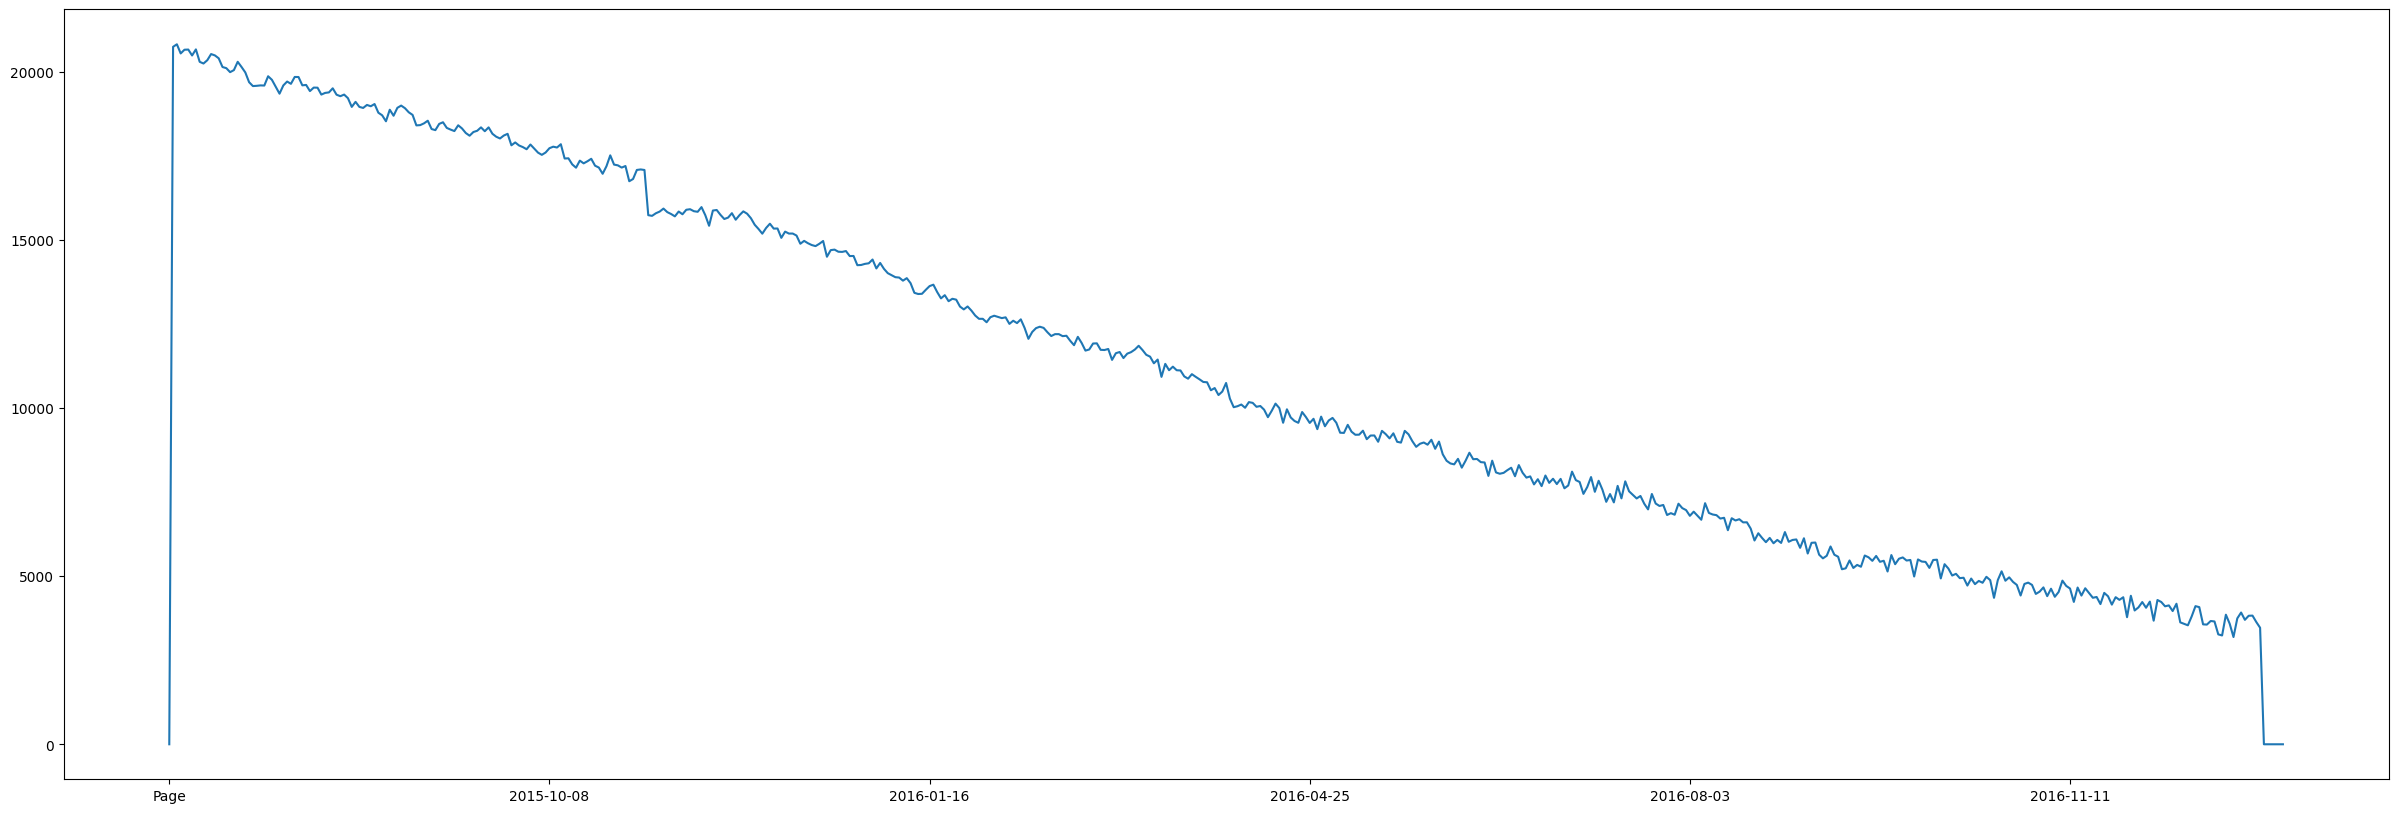

In [ ]:
plt.figure(figsize=(30,10))
data.isnull().sum(axis=0).plot()

* Click rate has Increased Across all Page from 1st Day to 550th day

In [ ]:
data.isnull().sum(axis=1)

0           0
1           0
2           0
3           0
4         291
         ... 
145058    544
145059    550
145060    550
145061    550
145062    550
Length: 145063, dtype: int64

<Axes: >

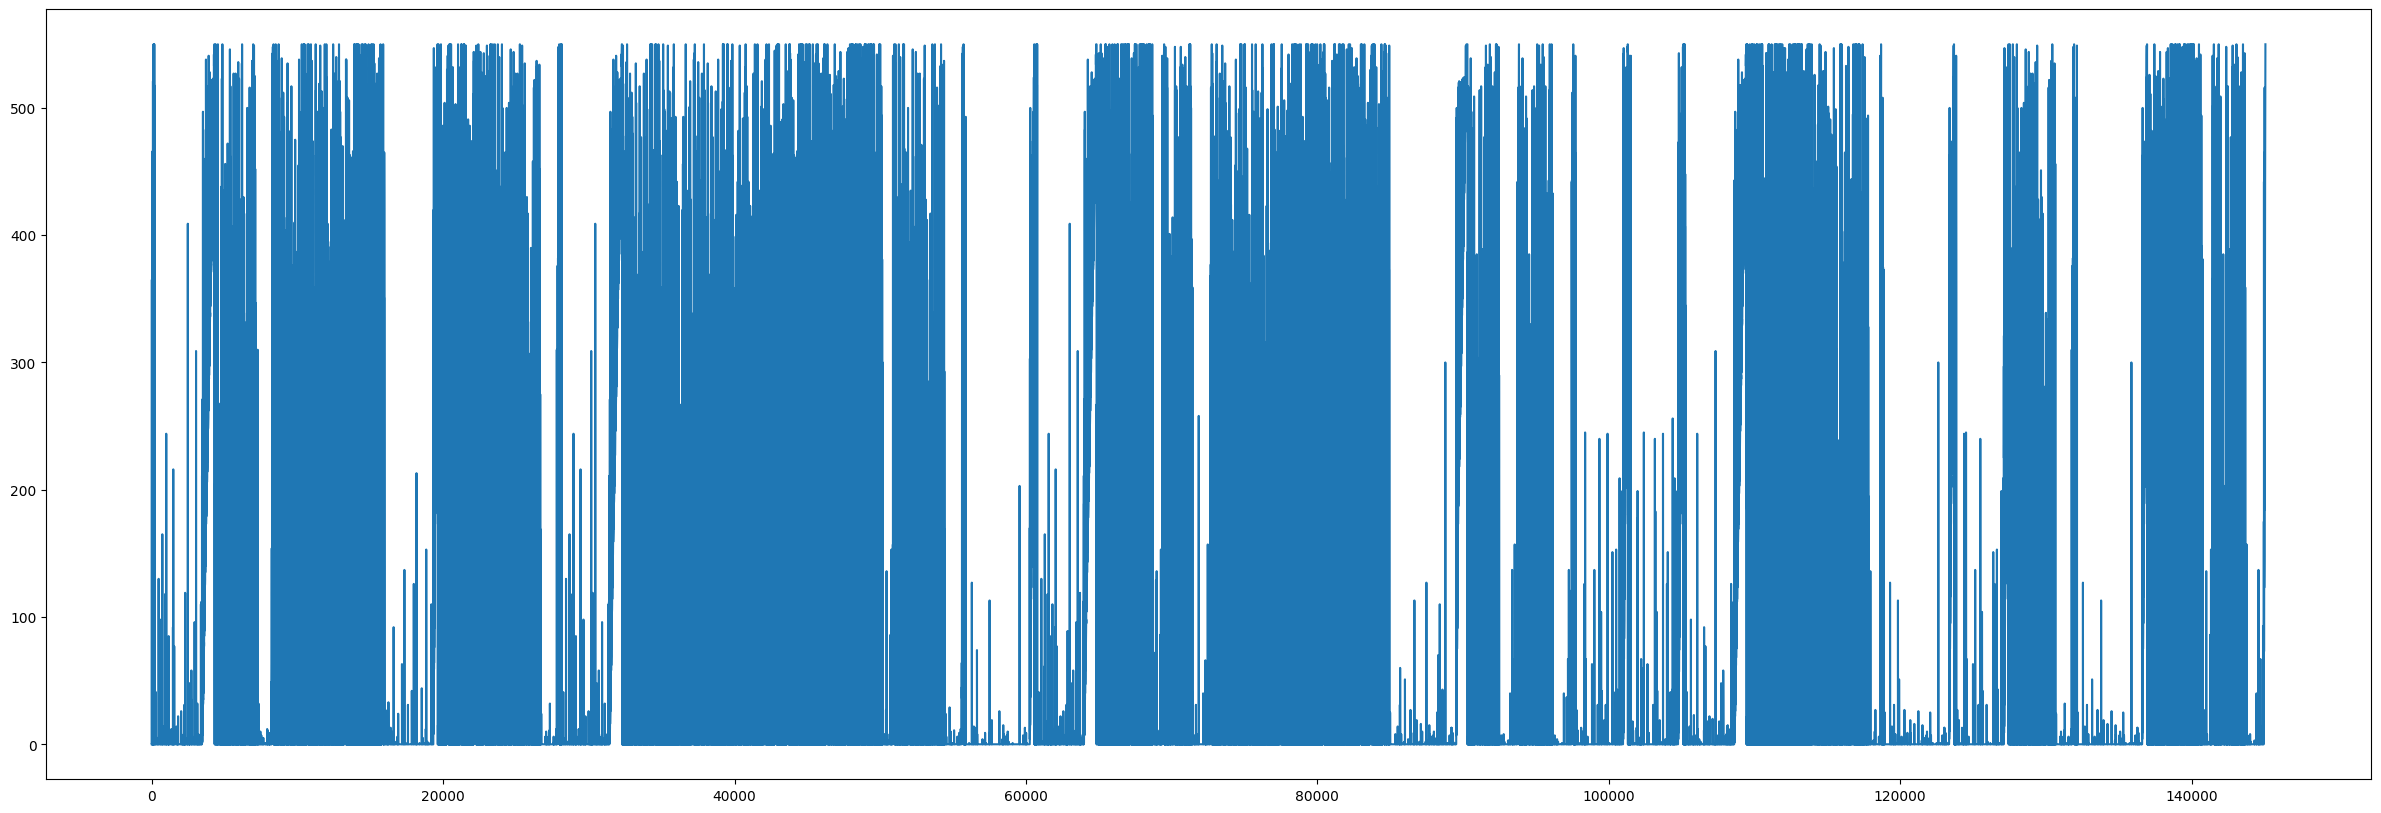

In [ ]:
plt.figure(figsize=(30,10))
data.isnull().sum(axis=1).plot()

* There are Rows in which no clicks are avaiable at all
* They give no good information for our analysis
* lets drop those Rows

In [ ]:
data = data[~(data.isnull().sum(axis=1) == 550)]

* As we have no of clicks in each date for all pages
* we will assume Nan as "Zero Clicks"
* So we will fill with "0"

In [ ]:
data.fillna(0,inplace= True)

In [ ]:
data.isnull().sum(axis=0).sum()

0

In [ ]:
data.drop(columns=["Page","Page1","Domain1"], axis=1, inplace=True)

In [ ]:
data.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Access,Origin,Domain,Language
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,14.0,20.0,22.0,19.0,18.0,20.0,all-access,spider,wikipedia,zh
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,9.0,30.0,52.0,45.0,26.0,20.0,all-access,spider,wikipedia,zh
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,all-access,spider,wikipedia,zh
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,16.0,11.0,17.0,19.0,10.0,11.0,all-access,spider,wikipedia,zh
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,11.0,27.0,13.0,36.0,10.0,all-access,spider,wikipedia,zh


In [ ]:
data[data.columns[-4:]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144411 entries, 0 to 145058
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Access    144411 non-null  object
 1   Origin    144411 non-null  object
 2   Domain    144411 non-null  object
 3   Language  144411 non-null  object
dtypes: object(4)
memory usage: 5.5+ MB


In [ ]:
for i in data.columns[-4:]:
  print("unique Values of",i, "are",data[i].nunique())
  print(data[i].value_counts())
  print("******************************************************************")

unique Values of Access are 3
all-access    74002
mobile-web    35813
desktop       34596
Name: Access, dtype: int64
******************************************************************
unique Values of Origin are 2
all-agents    109630
spider         34781
Name: Origin, dtype: int64
******************************************************************
unique Values of Domain are 3
wikipedia    126683
wikimedia     10477
mediawiki      7251
Name: Domain, dtype: int64
******************************************************************
unique Values of Language are 9
en         24010
ja         20340
de         18438
fr         17761
zh         17103
ru         14990
es         14041
commons    10477
www         7251
Name: Language, dtype: int64
******************************************************************


In [ ]:
data.columns[:-4]

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

## Group BY

* Lets do group by "Language" and take he mean of the data as Aggregation

In [ ]:
Language_data=data.groupby("Language")[data.columns[:-4]].mean()

In [ ]:
Language_data

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Language,,,,,,,,,,,,,,,,,,,,,
commons,108.888136,112.449174,109.816455,90.800515,100.986542,115.496707,120.438293,133.343419,115.665649,110.755751,...,191.299131,228.930705,190.439343,230.437721,253.815692,220.040374,248.068627,220.415482,239.206166,207.819319
de,719.195086,709.398850,680.878729,624.817171,726.344886,799.531294,775.371081,786.701052,757.391149,705.850852,...,833.637271,843.986007,815.549138,1288.661948,1213.610370,1091.510142,1038.745471,1000.537260,954.877427,898.292656
en,3528.204498,3516.807372,3338.930779,3476.185090,3590.113994,3865.449229,3658.394586,3451.903207,3531.816368,3511.847397,...,5018.391212,4702.429863,4992.124948,5161.444856,5793.924198,6065.336568,5884.146855,6270.617826,5223.014786,5148.846689
es,1088.138523,1039.884125,956.315932,897.837618,976.451535,1112.851934,1084.727156,1052.764760,1032.896945,938.998718,...,985.529521,936.947226,882.063386,905.445695,1197.865608,1135.628018,1180.640624,1114.388932,823.309949,788.969732
fr,476.247846,479.305895,460.899161,492.643545,483.671696,503.901751,487.067170,478.099938,473.151624,446.523450,...,653.509825,640.935589,619.643038,668.177974,939.047520,860.394685,775.942852,754.450538,702.160577,647.750183
ja,583.244838,669.655457,604.984415,759.893756,728.967748,635.228466,617.936480,614.197984,598.734415,622.070010,...,678.125172,972.338545,860.437414,822.036087,782.600442,792.689331,794.037119,869.355359,956.277630,1202.595821
ru,631.344496,642.271047,595.294396,559.920881,596.299400,642.354636,627.630420,624.690927,639.913876,732.813342,...,898.265510,886.730220,876.140961,1123.383389,1115.216478,1003.346765,933.977252,899.197932,804.986658,882.123616
www,48.229624,52.914081,44.919873,42.581161,46.681147,54.047028,59.758930,51.349193,45.739208,55.070473,...,47.453317,75.243001,70.467798,71.997104,41.582816,44.134188,100.653151,44.227693,59.537857,54.189767
zh,242.354441,242.717009,241.107350,243.433784,259.678770,261.023797,260.739110,267.546161,265.909080,276.436239,...,347.708004,342.928258,363.396188,384.132141,379.220780,378.789803,380.833772,353.303222,357.317605,368.272525


In [ ]:
Language_data = Language_data.transpose()

In [ ]:
Language_data

Language,commons,de,en,es,fr,ja,ru,www,zh
2015-07-01,108.888136,719.195086,3528.204498,1088.138523,476.247846,583.244838,631.344496,48.229624,242.354441
2015-07-02,112.449174,709.398850,3516.807372,1039.884125,479.305895,669.655457,642.271047,52.914081,242.717009
2015-07-03,109.816455,680.878729,3338.930779,956.315932,460.899161,604.984415,595.294396,44.919873,241.107350
2015-07-04,90.800515,624.817171,3476.185090,897.837618,492.643545,759.893756,559.920881,42.581161,243.433784
2015-07-05,100.986542,726.344886,3590.113994,976.451535,483.671696,728.967748,596.299400,46.681147,259.678770
...,...,...,...,...,...,...,...,...,...
2016-12-27,220.040374,1091.510142,6065.336568,1135.628018,860.394685,792.689331,1003.346765,44.134188,378.789803
2016-12-28,248.068627,1038.745471,5884.146855,1180.640624,775.942852,794.037119,933.977252,100.653151,380.833772
2016-12-29,220.415482,1000.537260,6270.617826,1114.388932,754.450538,869.355359,899.197932,44.227693,353.303222
2016-12-30,239.206166,954.877427,5223.014786,823.309949,702.160577,956.277630,804.986658,59.537857,357.317605


In [ ]:
Language_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   commons  550 non-null    float64
 1   de       550 non-null    float64
 2   en       550 non-null    float64
 3   es       550 non-null    float64
 4   fr       550 non-null    float64
 5   ja       550 non-null    float64
 6   ru       550 non-null    float64
 7   www      550 non-null    float64
 8   zh       550 non-null    float64
dtypes: float64(9)
memory usage: 59.1+ KB


In [ ]:
Language_data.columns

Index(['commons', 'de', 'en', 'es', 'fr', 'ja', 'ru', 'www', 'zh'], dtype='object', name='Language')

* lets change dtype of index to "datetime64"

In [ ]:
Language_data.index = pd.date_range('2015-07-01', '2016-12-31', freq='D')

In [ ]:
Language_data.index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=550, freq='D')

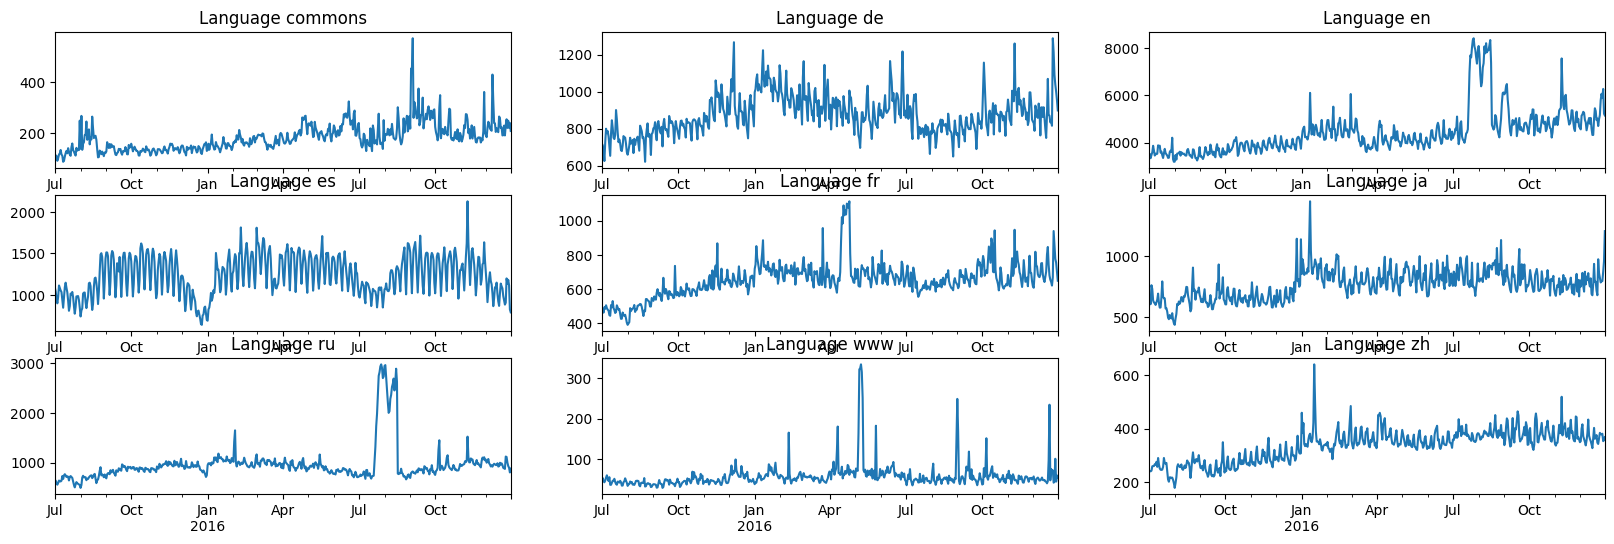

In [ ]:
for i in range(9):
  plt.subplot(3,3,i+1)
  Language_data[Language_data.columns[i]].plot()
  plt.title(f"Language {Language_data.columns[i]}")


* There are unusal spikes in the page visits
* This might be due to some unknown Exog values
* so later on we will use Triple Exponential Smoothening to smoothen the data and removing unsual spikes

## Stationality Test

In [ ]:
import statsmodels.api as sm
def adf_test(data, significance_level=0.05):
    pvalue = sm.tsa.stattools.adfuller(data)[1]

    if pvalue <= significance_level:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')

In [ ]:
for i in range(9):
  print(Language_data.columns[i], end =" ")
  adf_test(Language_data[Language_data.columns[i]])

commons Sequence is not stationary
de Sequence is not stationary
en Sequence is not stationary
es Sequence is stationary
fr Sequence is not stationary
ja Sequence is not stationary
ru Sequence is stationary
www Sequence is stationary
zh Sequence is not stationary


**From Now on we will proceed for Analysis with one Language " en"**

<Axes: >

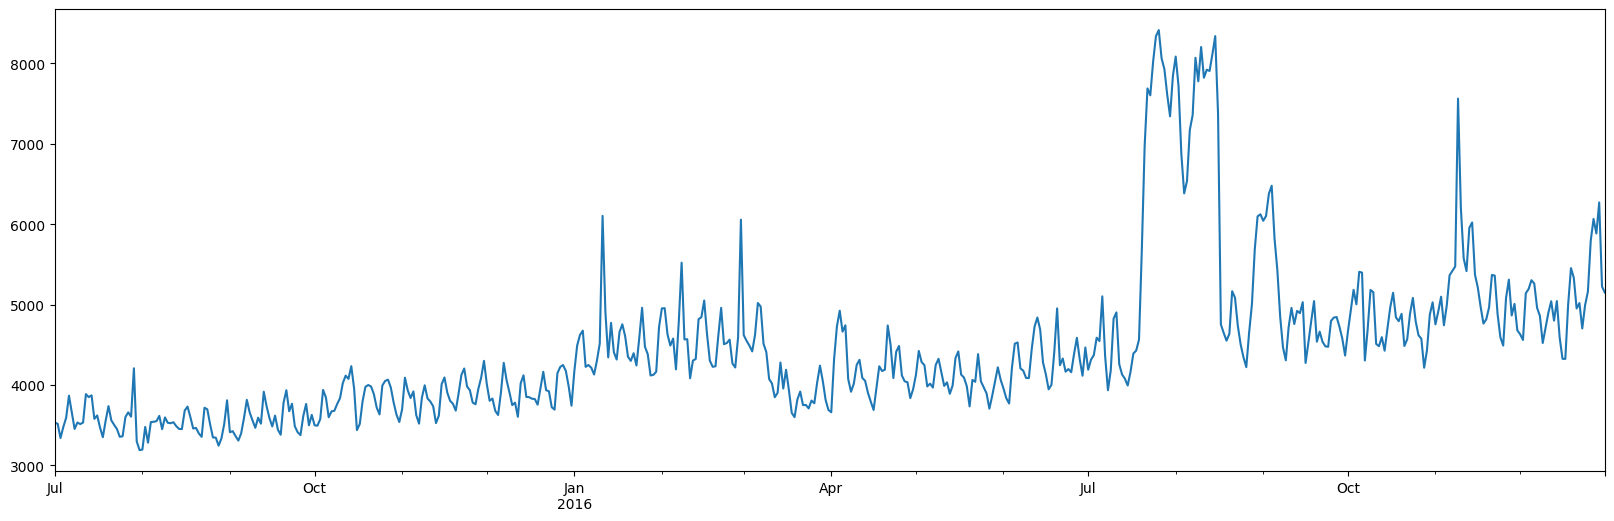

In [ ]:
Language_data.en.plot()

## Decomposition

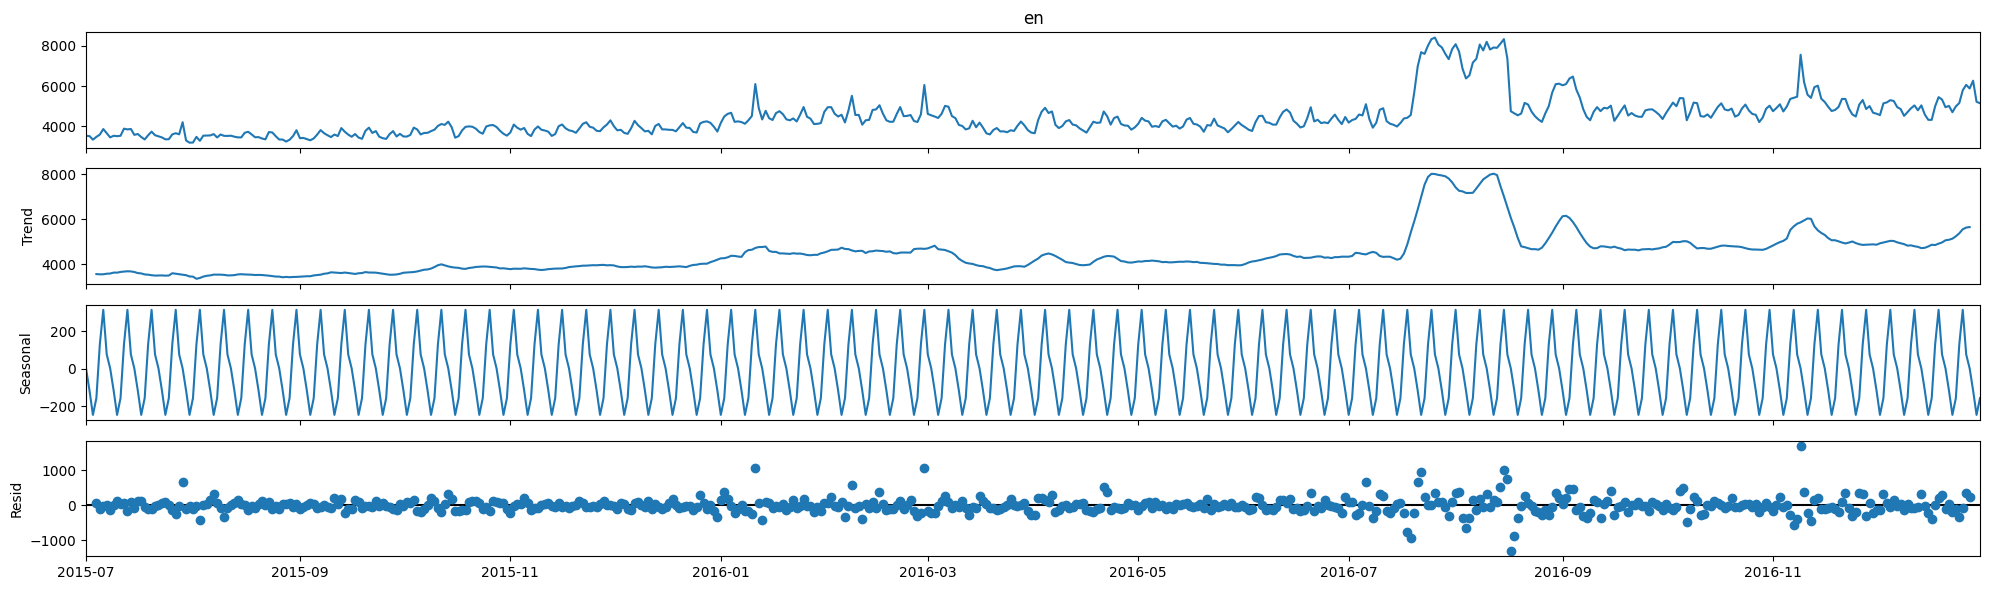

In [ ]:
import statsmodels.api as sm
model = sm.tsa.seasonal_decompose(Language_data["en"], model = 'additive')
model.plot()
plt.show()

<Axes: >

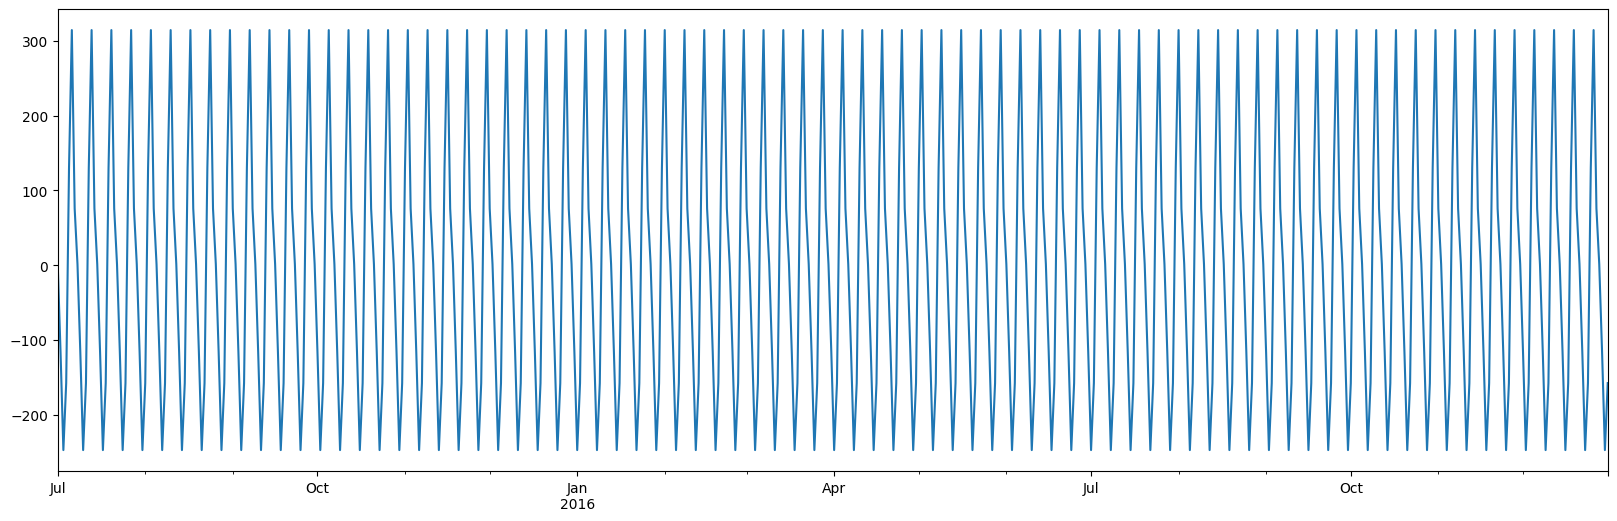

In [ ]:
model.seasonal.plot()

* From decomposition we can see Trend, Seasonality and Residuals properly
* From the seasonal graph, we can see that there is weekly seasonality

## Detrending and DeSeasoning

### ACF Plot

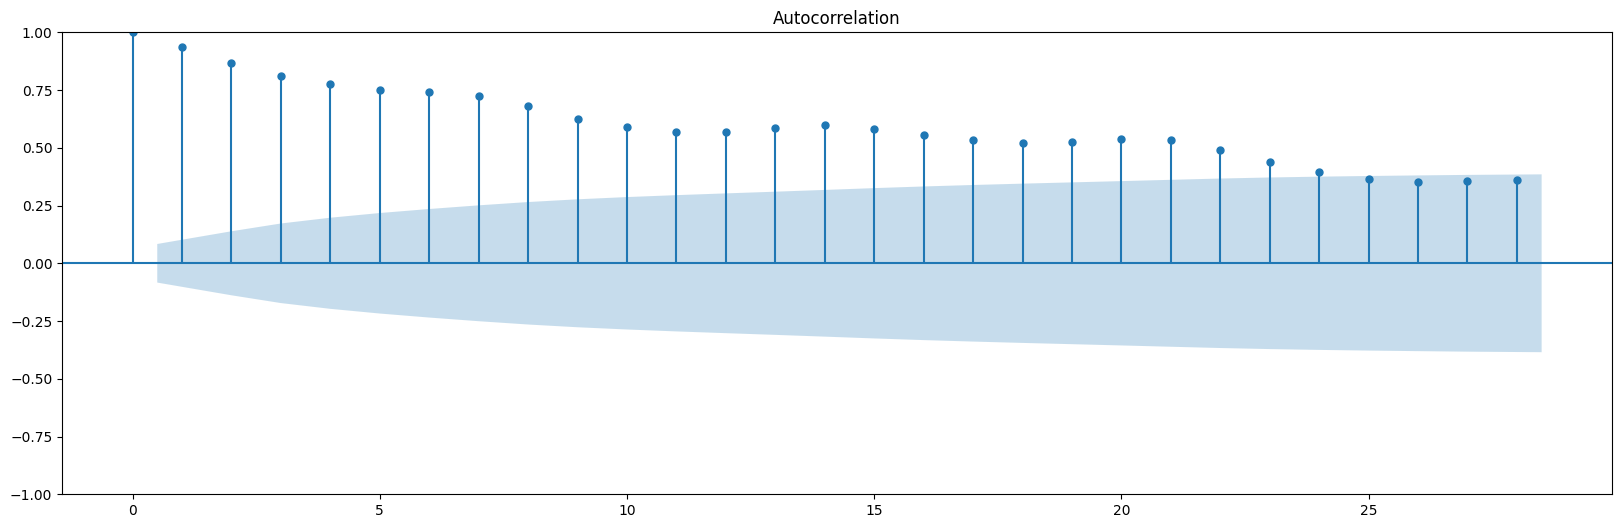

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Language_data.en)
plt.show()

* There is gradual decreas in the ACF values, which shows that there is trend in the Data
* we will detrend to make series stationary

### PACF plots

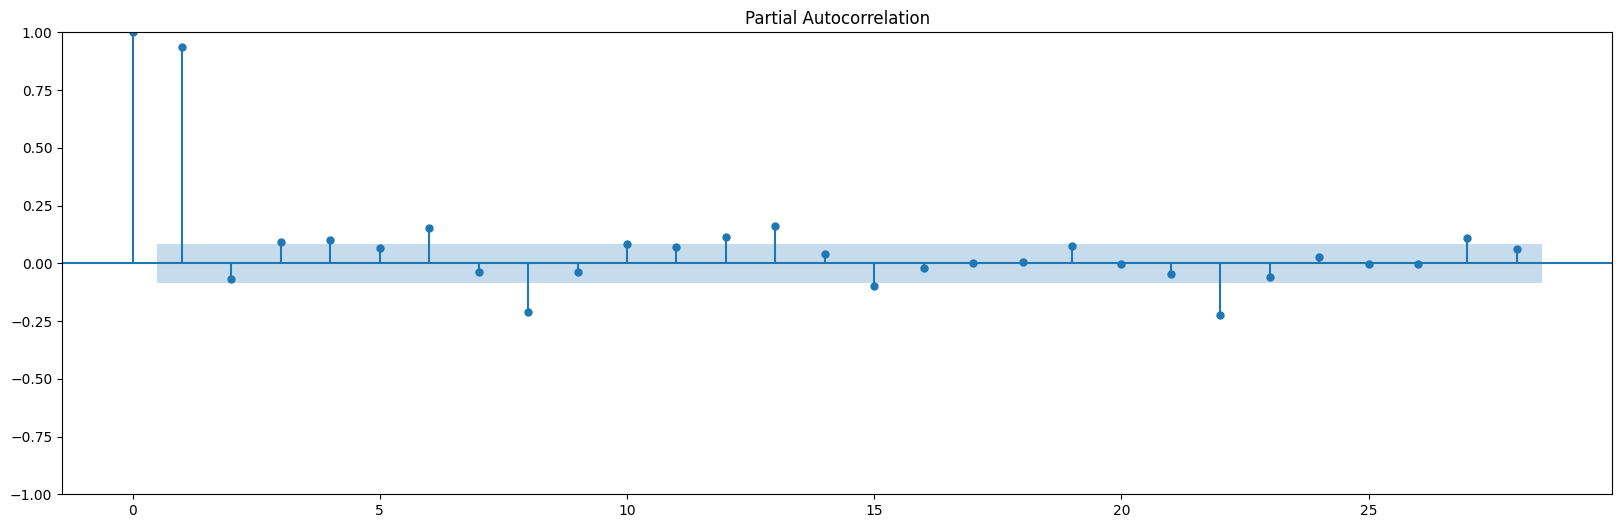

In [ ]:
plot_pacf(Language_data.en)
plt.show()

* there is Sharp cut off after lag = 1 , thereafter there is significant rise in the PACF value at every interval of 7
* * we can consider our order as p = 7 for AutoRegression [AR] model

### Detrending & Deseasoning

In [ ]:
adf_test(Language_data.en, significance_level=0.05)

Sequence is not stationary


* Lets detrend the "en" Series by differencing
* step1: we will do difference , step2 : then check stationary test ....repeat 2 steps until data is Stationary

In [ ]:
Language_data["en_stationary"]= Language_data.en.diff(1)

<Axes: >

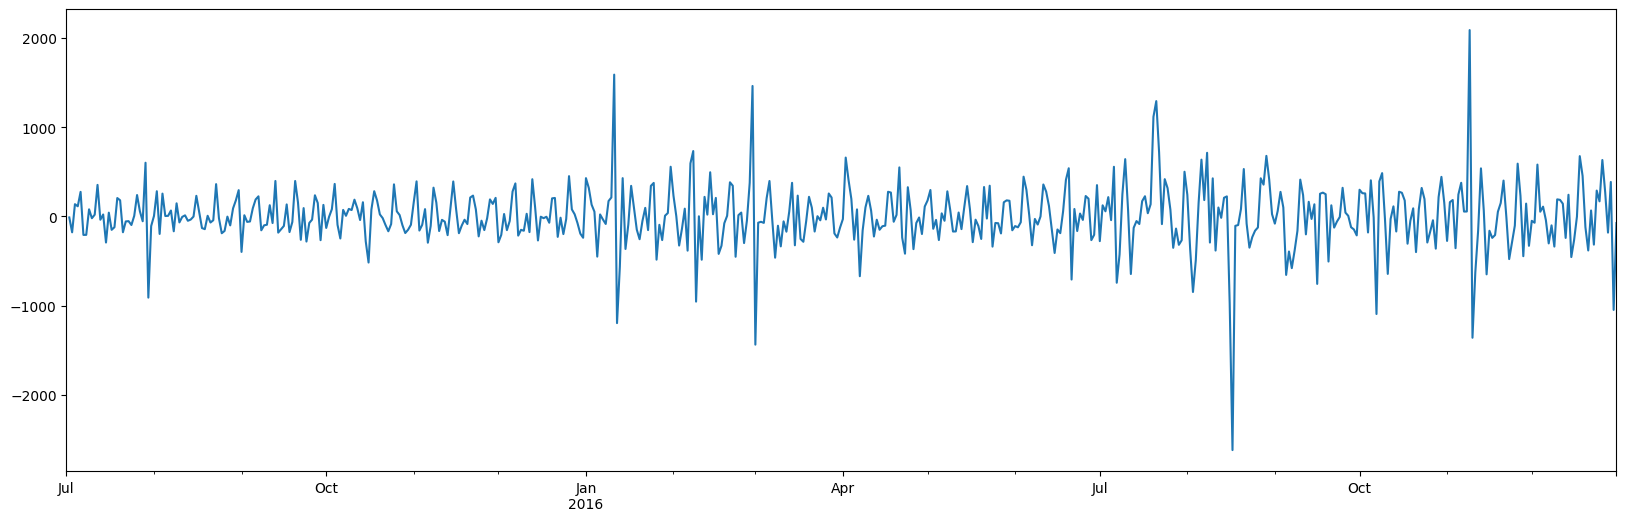

In [ ]:
Language_data["en_stationary"].plot()

In [ ]:
Language_data["en_stationary"].isna().sum()

1

In [ ]:
Language_data["en_stationary"] = Language_data["en_stationary"].fillna(0)

In [ ]:
adf_test(Language_data["en_stationary"], significance_level=0.05)

Sequence is stationary


* Now we can see that "en_detrend" Series is Stationary

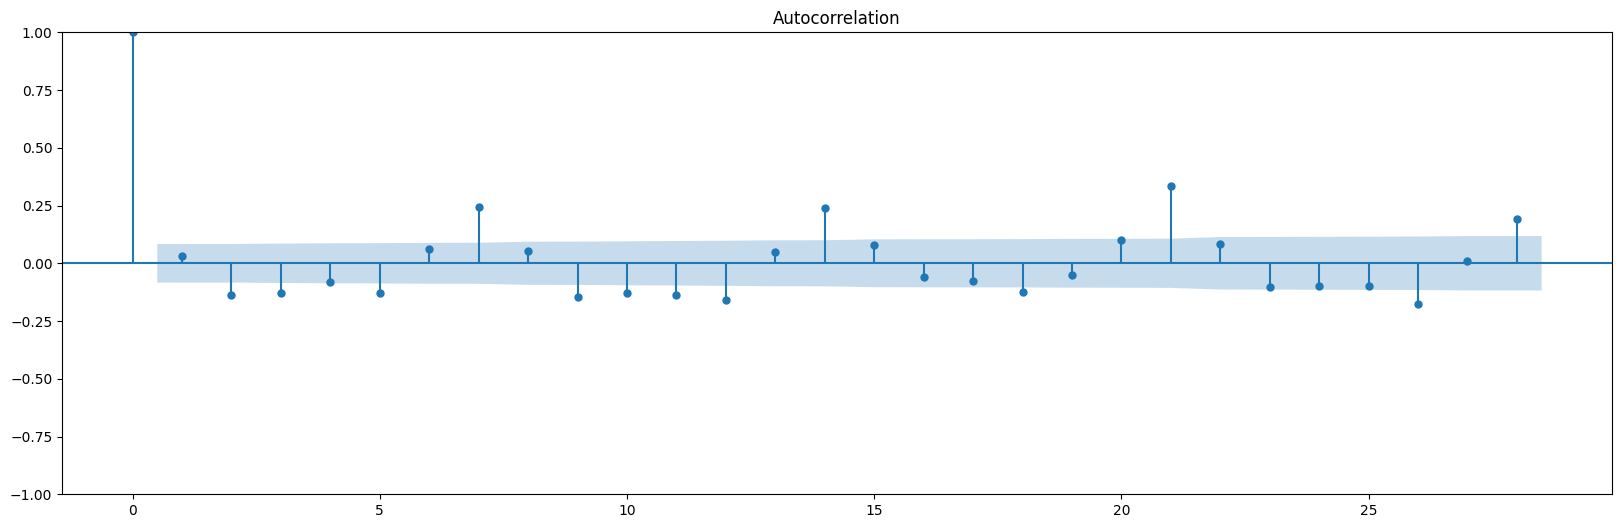

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Language_data["en_stationary"])
plt.show()

* we can consider our order as q = 7 for Moving average [MA] model

## Train Test Data Splitting

In [ ]:
Language_data.head()

Language,commons,de,en,es,fr,ja,ru,www,zh,en_stationary
2015-07-01,108.888136,719.195086,3528.204498,1088.138523,476.247846,583.244838,631.344496,48.229624,242.354441,0.000000
2015-07-02,112.449174,709.398850,3516.807372,1039.884125,479.305895,669.655457,642.271047,52.914081,242.717009,-11.397126
2015-07-03,109.816455,680.878729,3338.930779,956.315932,460.899161,604.984415,595.294396,44.919873,241.107350,-177.876593
2015-07-04,90.800515,624.817171,3476.185090,897.837618,492.643545,759.893756,559.920881,42.581161,243.433784,137.254311
2015-07-05,100.986542,726.344886,3590.113994,976.451535,483.671696,728.967748,596.299400,46.681147,259.678770,113.928905


* As observed earlier, there is a weekly seasonality, so we take 8 weeks data for testing

In [ ]:
train = Language_data.loc[Language_data.index < Language_data.index[-56]][["en"]].copy()
test = Language_data.loc[Language_data.index >= Language_data.index[-56]][["en"]].copy()

train.tail(5)

Language,en
2016-11-01,4753.236401
2016-11-02,4913.487422
2016-11-03,5097.526447
2016-11-04,4741.684965
2016-11-05,4986.666014


In [ ]:
test.head(5)

Language,en
2016-11-06,5363.628322
2016-11-07,5418.339442
2016-11-08,5473.774802
2016-11-09,7562.455727
2016-11-10,6202.818825


## Model Performance Function

In [129]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

## ARIMA

From the above analysis we will fix our model parameters as below
* p = 7
* q = 7
* d = 1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


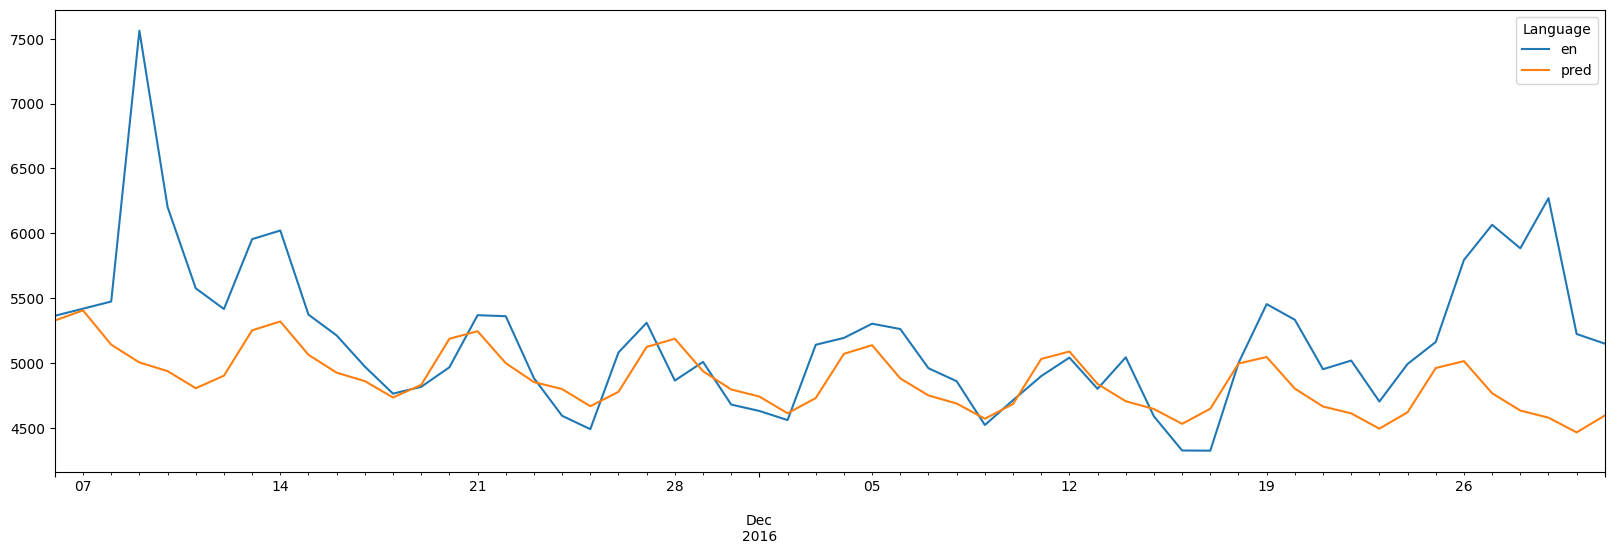

In [134]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order = (7, 1, 7))
model = model.fit(disp=False)

test['pred'] = model.forecast(steps=56)

test.plot();

In [135]:
performance(test['en'], test['pred'])

MAE : 381.581
RMSE : 598.808
MAPE: 0.068


In [152]:
best_score = 1
for p in np.arange(1,8):
  for q in np.arange(1,8):
    order = (p,1,q)
    model = SARIMAX(train, order = order)
    model = model.fit(disp=False)
    test['pred'] = model.forecast(steps=56)
    if (mape(test['en'], test['pred'])) < best_score :
      best_score, best_cfg = mape(test['en'], test['pred']), order

print('Best ARIMA%s MAPE=%.3f' % (best_cfg, best_score))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Max

Best ARIMA(3, 1, 3) MAPE=0.062


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


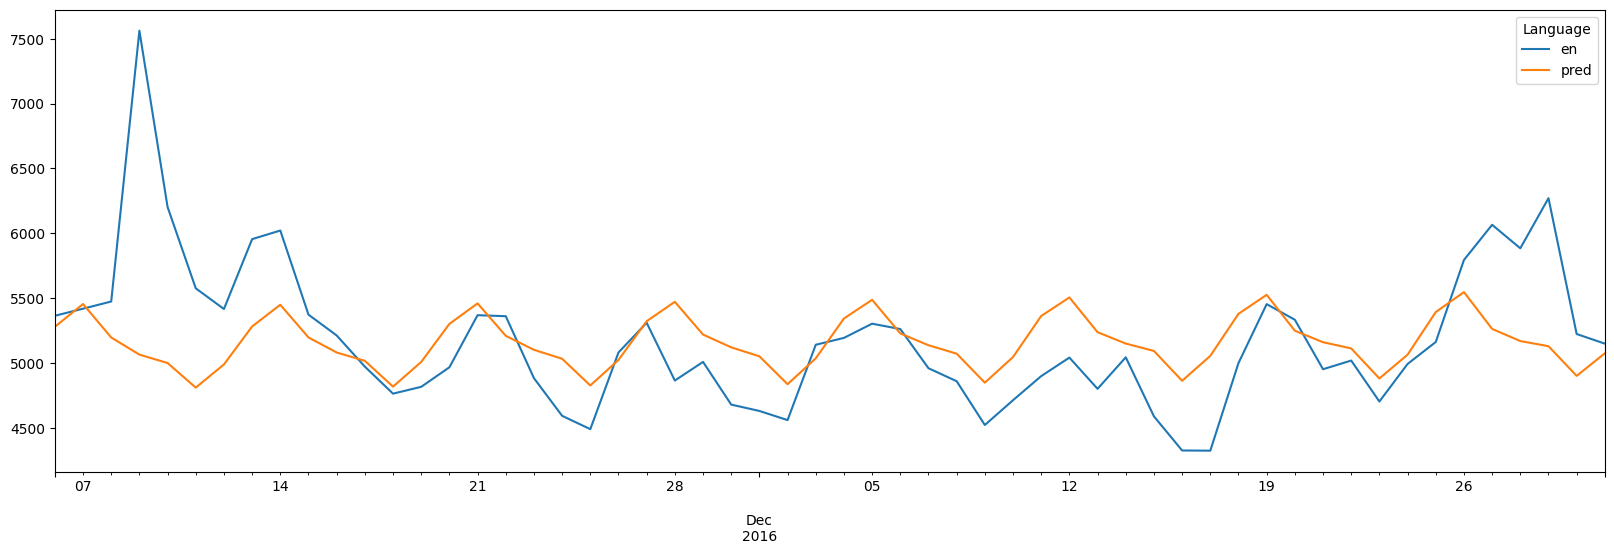

In [158]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order = (3, 1, 3),seasonal_order = (1, 1, 1, 7))
model = model.fit(disp=False)

test['pred'] = model.forecast(steps=56)

test.plot();

In [161]:
performance(test['en'], test['pred'])

MAE : 352.055
RMSE : 535.395
MAPE: 0.065


## SARIMAX

### Exog Data load

In [ ]:
campaign = pd.read_csv("Exog_Campaign_eng")

In [ ]:
campaign.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [ ]:
campaign.shape

(550, 1)

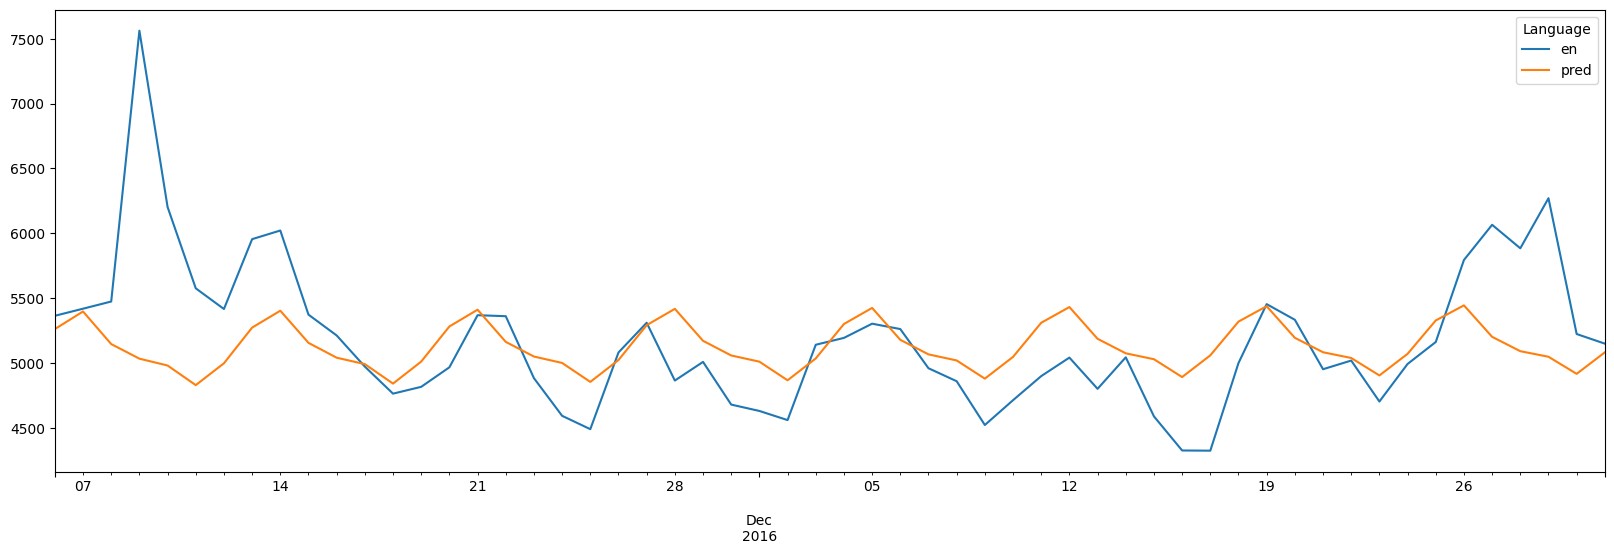

In [160]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order = (3, 1, 3),seasonal_order = (1, 0, 1, 7))
model = model.fit(disp=False)

test['pred'] = model.forecast(steps=56)

test.plot();

## Prophet